In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
#Importing the dataset
data = pd.read_csv("Q4_MultiClassLogR.csv")
X = data.iloc[:, [0, 1]].values
y = data.iloc[:, 2].values
data

,X1,X2,Y
0,3.25,7.956,2
1,3.30,2.200,0
2,3.32,3.410,0
3,3.35,10.272,2
4,4.01,1.650,0
5,4.03,2.510,0
6,4.05,4.210,0
7,4.05,7.380,2
8,4.06,11.412,2
9,4.07,9.198,2


In [3]:
#create the training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.16, random_state = 0)

In [4]:
#Feature Scaling
#It does not need to scale y_train because it contains categorical data 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [5]:
#Fitting the Logistic Regression to the Training Set:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
# checking accuracy
model.score(X_test, y_test)

0.75

In [7]:
#Predicting the Test set results from the question
predict = [[4.01,3.02],[9.1,6.5],[3.5,9.5],[6.01,6.01]]
y_predict = model.predict(predict)
print(f"predicted values are: {y_predict[0]}, {y_predict[1]}, {y_predict[2]}, {y_predict[3]}")

predicted values are: 1, 1, 2, 1


In [8]:
#Confusion Matrix contains the correct and #incorrect predictions of our model 
from sklearn.metrics import confusion_matrix

#y_true parameter will be y_test
#y_pred is the logistic regression model prediction
cm = confusion_matrix(y_test, y_predict)
cm

array([[0, 2, 1],
       [0, 1, 0],
       [0, 0, 0]])

Text(69.0, 0.5, 'Truth')

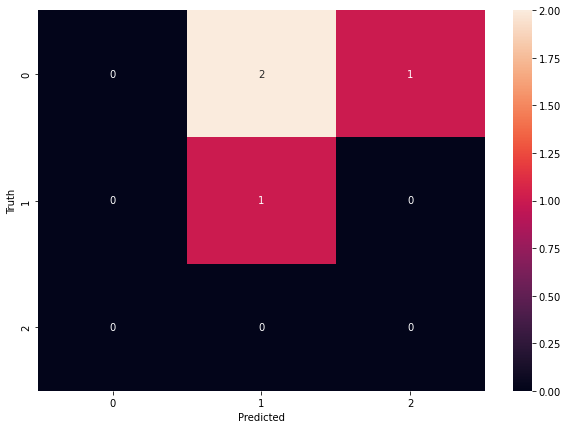

In [9]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')